In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['pdf.fonttype'] = 42

def plot_radar_by_tool(metric, group_name, values, input_dir, save_path):
    cluster_labels = [f"Cluster {i+1}" for i in range(len(values))]
    model_scores = {}

    # Define custom color set
    color_set = ["#4E526E", "#E07A5F", "#F0C3AF", "#F6D5A0", "#92BEAA", "#718B8E"]

    # Load and aggregate model scores
    for val in values:
        file_path = os.path.join(input_dir, f"BenchmarkSet_bootstrap_{group_name}_{val}_{metric}.csv")
        if not os.path.exists(file_path):
            print(f"[SKIP] {file_path} not found.")
            continue

        df = pd.read_csv(file_path)
        df = df.rename(columns={"immunostl": "ImmunoSTL", "immunoMTL_shuffle": "ImmunoMTL_shuffle"})
        df = df.drop(columns=["IEPAPI", "EL_score"], errors='ignore')
        for model in df.columns:
            if model not in model_scores:
                model_scores[model] = []
            model_scores[model].append(df[model].mean())

    # Radar plot setup
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each model
    for i, (model, scores) in enumerate(model_scores.items()):
        if len(scores) != len(values):
            continue
        values_loop = scores + [scores[0]]
        color = color_set[i % len(color_set)]
        ax.plot(angles, values_loop, label=model, linewidth=4, color=color)

        # Add dots at each axis for clarity
        for angle, val in zip(angles[:-1], scores):
            ax.plot(angle, val, 'o', color=color, markersize=4)

    # Style adjustments
    ax.spines['polar'].set_color("#949494")
    ax.spines['polar'].set_linewidth(0)
    ax.grid(color="#949494", linewidth=2, linestyle='--')
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), cluster_labels, fontsize=14, fontweight='normal')
    
    ax.set_title(f"{metric} across MMS clusters", fontsize=16, pad=40, fontweight='normal')
    ax.set_ylim(0.3, 0.7)
    ax.set_yticks(np.linspace(0.3, 0.75, 4))
    ax.set_rlabel_position(300)
    ax.yaxis.set_tick_params(labelsize=14, pad=20)

    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.27), fontsize=14)
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    print(f"[SAVED] {save_path}")
    plt.savefig(save_path.replace("png", "pdf"), dpi=300, bbox_inches='tight', transparent=True)
    print(f"[SAVED] {save_path}")
    plt.show()

[SAVED] ../analysis/figures/Radar_MMScluster_AUROC.png
[SAVED] ../analysis/figures/Radar_MMScluster_AUROC.png


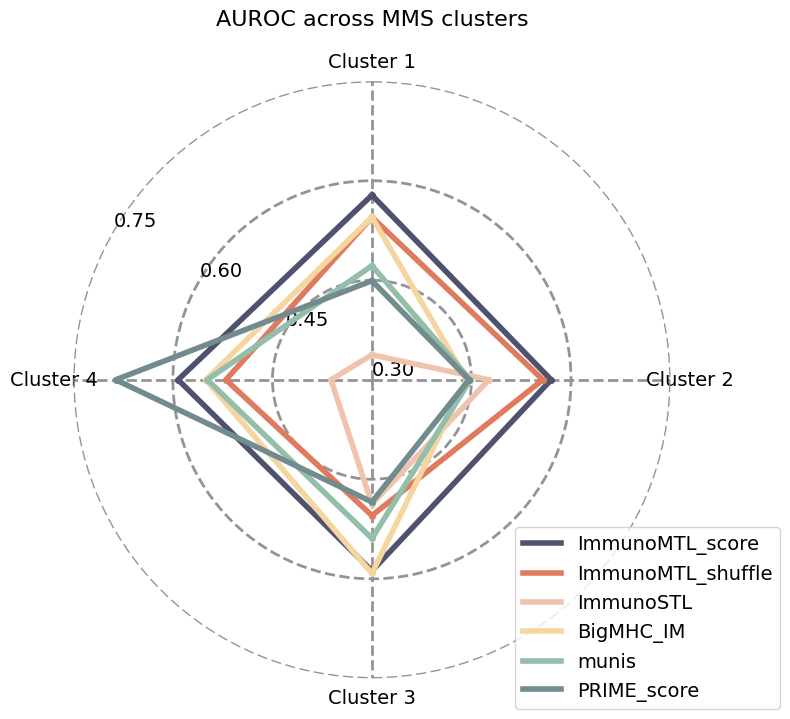

[SAVED] ../analysis/figures/Radar_MMScluster_AP.png
[SAVED] ../analysis/figures/Radar_MMScluster_AP.png


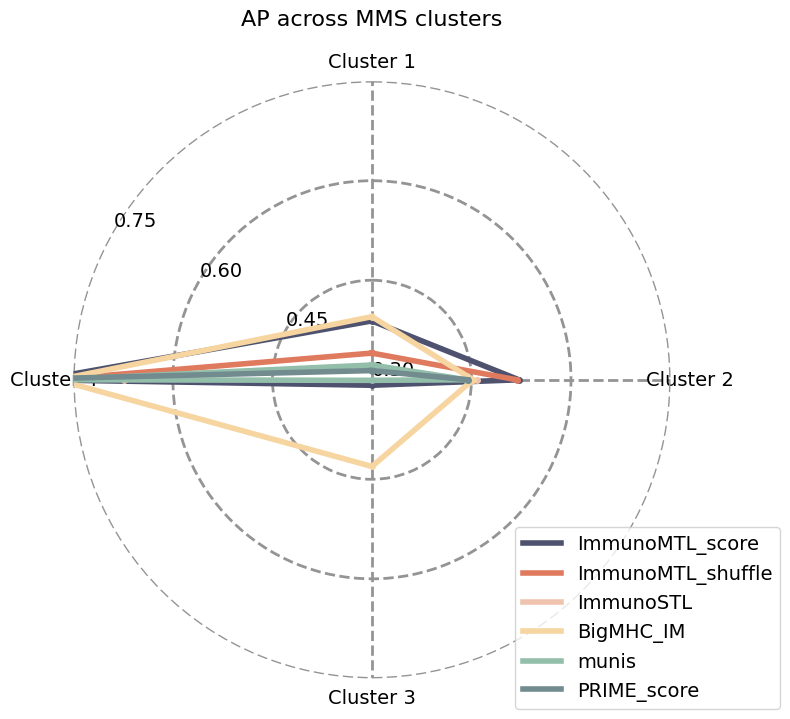

In [3]:
input_dir = "../analysis/groupwise_bootstrap"
output_dir = "../analysis/figures"
os.makedirs(output_dir, exist_ok=True)

clusters = [0.0, 1.0, 2.0, 3.0]

for metric in ["AUROC", "AP"]:
    out_path = os.path.join(output_dir, f"Radar_MMScluster_{metric}.png")
    plot_radar_by_tool(metric, "MMS_Cluster", clusters, input_dir, out_path)

In [4]:
plt.rcParams['pdf.fonttype'] = 42

def plot_radar_by_tool(metric, group_name, values, input_dir, save_path):
    cluster_labels = [f"{v}-mer" for v in values]
    model_scores = {}

    # Define custom color set
    color_set = ["#4E526E", "#E07A5F", "#F0C3AF", "#F6D5A0", "#92BEAA", "#718B8E"]

    # Load and aggregate model scores
    for val in values:
        file_path = os.path.join(input_dir, f"BenchmarkSet_bootstrap_{group_name}_{val}_{metric}.csv")
        if not os.path.exists(file_path):
            print(f"[SKIP] {file_path} not found.")
            continue

        df = pd.read_csv(file_path)
        df = df.rename(columns={"immunostl": "ImmunoSTL", "immunoMTL_shuffle": "ImmunoMTL_shuffle"})
        df = df.drop(columns=["IEPAPI", "EL_score"], errors='ignore')
        for model in df.columns:
            if model not in model_scores:
                model_scores[model] = []
            model_scores[model].append(df[model].mean())

    # Radar plot setup
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each model
    for i, (model, scores) in enumerate(model_scores.items()):
        if len(scores) != len(values):
            continue
        values_loop = scores + [scores[0]]
        color = color_set[i % len(color_set)]
        ax.plot(angles, values_loop, label=model, linewidth=4, color=color)

        # Add dots at each axis for clarity
        for angle, val in zip(angles[:-1], scores):
            ax.plot(angle, val, 'o', color=color, markersize=4)

    # Style adjustments
    ax.spines['polar'].set_color("#949494")
    ax.spines['polar'].set_linewidth(0)
    ax.grid(color="#949494", linewidth=2, linestyle='--')
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), cluster_labels, fontsize=14, fontweight='normal')
    
    ax.set_title(f"{metric} across Peptide Lengths", fontsize=16, pad=40, fontweight='normal')
    ax.set_ylim(0.3, 0.9)
    ax.set_yticks(np.linspace(0.3, 0.9, 4))
    ax.set_rlabel_position(300)
    ax.yaxis.set_tick_params(labelsize=14, pad=20)

    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.27), fontsize=14)
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    print(f"[SAVED] {save_path}")
    plt.savefig(save_path.replace("png", "pdf"), dpi=300, bbox_inches='tight', transparent=True)
    print(f"[SAVED] {save_path}")
    plt.show()

[SAVED] ../analysis/figures/Radar_Length_AUROC.png
[SAVED] ../analysis/figures/Radar_Length_AUROC.png


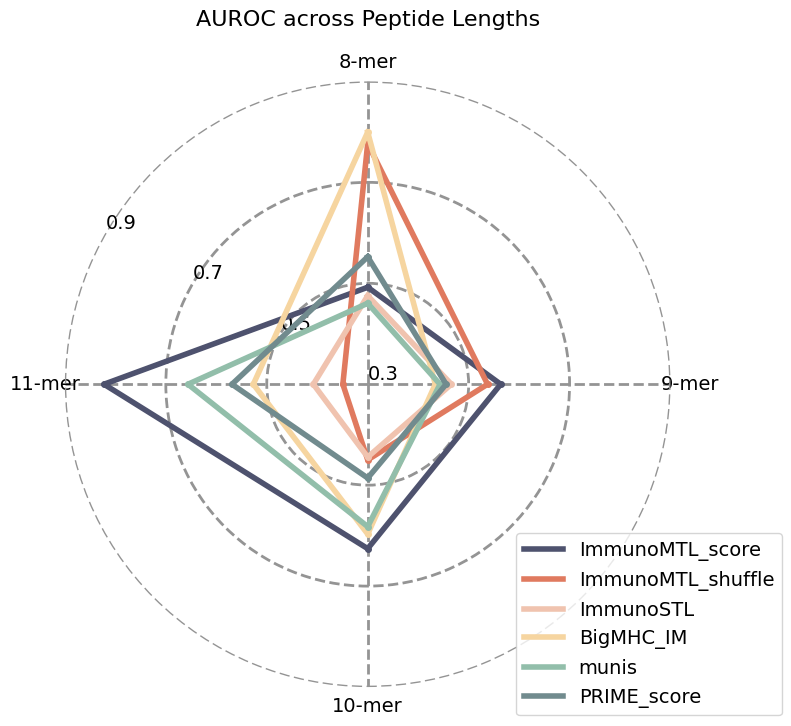

[SAVED] ../analysis/figures/Radar_Length_AP.png
[SAVED] ../analysis/figures/Radar_Length_AP.png


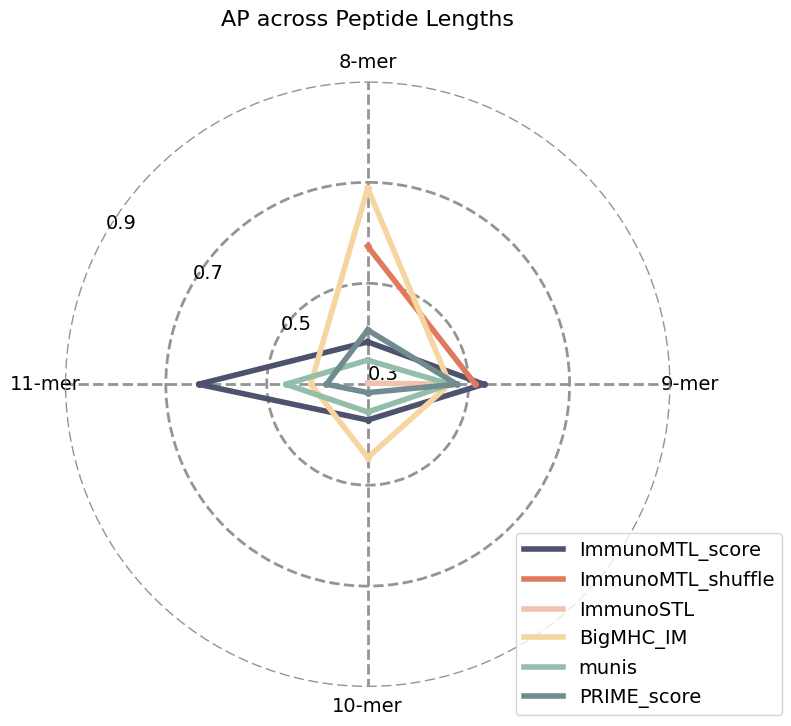

In [5]:
lengths = [8, 9, 10, 11]

for metric in ["AUROC", "AP"]:
    out_path = os.path.join(output_dir, f"Radar_Length_{metric}.png")
    plot_radar_by_tool(metric, "Length", lengths, input_dir, out_path)